# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

In [3]:
import osmnx as ox
from IPython.display import IFrame

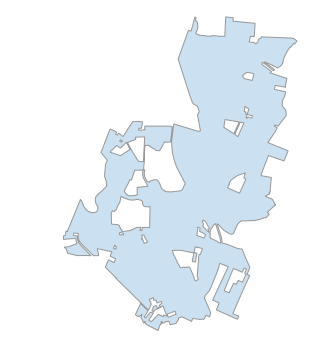

(<matplotlib.figure.Figure at 0xca573b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xca575b0>)

In [8]:
import networkx as nx
city = ox.gdf_from_place('Georgetown, KY')
ox.plot_shape(ox.project_gdf(city))

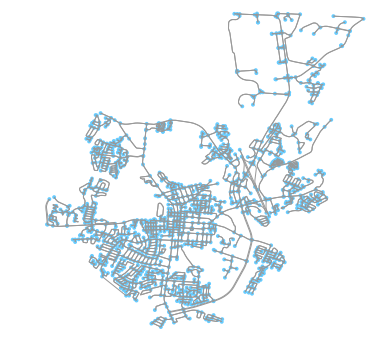

(<matplotlib.figure.Figure at 0xf002330>,
 <matplotlib.axes._subplots.AxesSubplot at 0xf002830>)

In [9]:
G = ox.graph_from_place('Georgetown, Kentucky', network_type='drive')
ox.plot_graph(G)

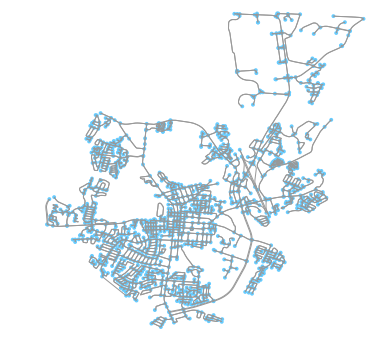

(<matplotlib.figure.Figure at 0xefe6c30>,
 <matplotlib.axes._subplots.AxesSubplot at 0xefe6f70>)

In [10]:
places = [
    {'city':'Georgetown', 'state':'Kentucky'}]
F = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

In [11]:
G = ox.graph_from_place({'city':'Versailles', 'state':'Kentucky'}, network_type='drive')
basic_stats = ox.basic_stats(G)
basic_stats

{'circuity_avg': 1.1242993728452095,
 'count_intersections': 286,
 'edge_density_km': None,
 'edge_length_avg': 157.33032557914814,
 'edge_length_total': 145687.88148629118,
 'intersection_density_km': None,
 'k_avg': 4.951871657754011,
 'm': 926,
 'n': 374,
 'node_density_km': None,
 'self_loop_proportion': 0.02159827213822894,
 'street_density_km': None,
 'street_length_avg': 163.93325320642782,
 'street_length_total': 81146.960337181765,
 'street_segments_count': 495,
 'streets_per_node_avg': 2.6818181818181817,
 'streets_per_node_counts': {0: 0, 1: 88, 2: 0, 3: 231, 4: 53, 5: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.23529411764705882,
  2: 0.0,
  3: 0.6176470588235294,
  4: 0.14171122994652408,
  5: 0.0053475935828877}}

C:\Program Files\Anaconda3\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1432, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.20.192.13', 63664), raddr=('193.63.75.109', 443)>
  self._sock = None
C:\Program Files\Anaconda3\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1688, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.20.192.13', 63673), raddr=('193.63.75.109', 443)>
  self._sock = None
C:\Program Files\Anaconda3\lib\socket.py:646: ResourceWarning: unclosed <socket.socket fd=1572, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.20.192.13', 63678), raddr=('193.63.75.109', 443)>
  self._sock = None


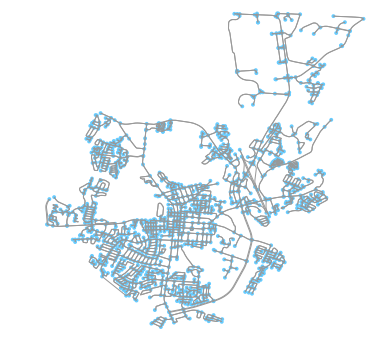

(<matplotlib.figure.Figure at 0xcb7d150>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1be10490>)

In [17]:
places = [
          {'city':'Georgetown', 'state':'Kentucky'},
          {'city':'Frankfort','state':'Kentucky'},
          {'city':'Versailles','state':'Kentucky'},              ]
G = ox.graph_from_place(places, network_type='drive')
ox.plot_graph(G)

In [ ]:
G = ox.graph_from_address('Georgetown, Kentucky', network_type='drive')
route = nx.shortest_path(G, origin_node, destination_node)
ox.plot_graph_route(G,route)

In [26]:
# use networkx to calculate the shortest path between two nodes
origin_node = 666524736
destination_node = 1438521754

route = nx.shortest_path(G, origin_node, destination_node)

NetworkXError: The node 666524736 is not in the digraph.

In [27]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

NameError: name 'route' is not defined

In [28]:
# save as html file then display map as an iframe
filepath = 'route.html'
route_map.save(filepath)

NameError: name 'route_map' is not defined

In [29]:
# use networkx to calculate the shortest path between two nodes
origin_node = 286460031
destination_node = 311672565

route = nx.shortest_path(G, origin_node, destination_node)

NetworkXError: The node 286460031 is not in the digraph.